# Multinomial logistic regression

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
x_data = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_data = [2, 2, 2, 1, 1, 1, 0, 0]

In [3]:
x_train = torch.FloatTensor(x_data)
y_train = torch.LongTensor(y_data)

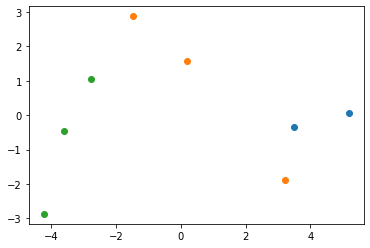

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

for label in range(3):
    x_one_pre = x_pca[y_train==label]
    plt.scatter(x_one_pre[:, 0], x_one_pre[:, 1])

### cost

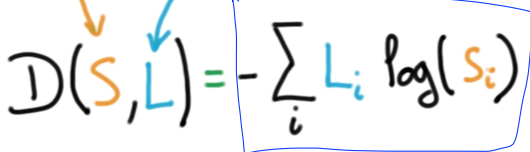

In [5]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/cross_entropy.png'
Image(image_url)
# cross entropy function

Pytorch has cross entropy function:  
torch.nn.functional.cross_entropy(input, target, ...)


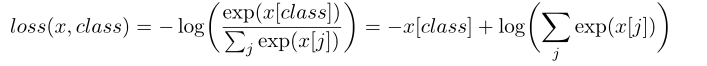

In [6]:
from IPython.display import Image
image_url = 'https://bitbucket.org/hyuk125/lg_dic/raw/99785e9d01523e8bb6bf78d1220c1b020fa6c7c8/image_day1/torch_cross_entropy.png'
Image(image_url)

In [7]:
predict = torch.FloatTensor(np.array([[0.5, 0.2], [0.1, 0.7], [0.9, 2.3]]))
label = torch.FloatTensor(np.array([0, 0, 1])).long()

In [8]:
 F.cross_entropy(predict, label)

tensor(0.6041)

## 과제2. 위 데이터를 nn.Module을 활용하여 multinomial logisitc regression하는 코드를 작성하시오
#### 단, epoch=1000, learning rate=1로 하시오

In [16]:
class my_multilogic(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4, 3)  # why 4, 3? 4 : x가 4xn 행열, 3: y 의 label 수가 0, 1, 2 로 3개
    self.sigmoid = nn.Sigmoid() # Just add sigmoid function!

  def forward(self, x):
    return self.linear(x)

In [17]:
model = my_multilogic()

In [28]:
# Training
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    '''
    if epoch % 20 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} '.format(
            epoch, nb_epochs, cost.item(), 
        ))
    '''

### 결과 출력

In [29]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

In [30]:
torch.max(model(x_train), axis=1).indices == 2

tensor([ True,  True,  True, False, False, False, False, False])

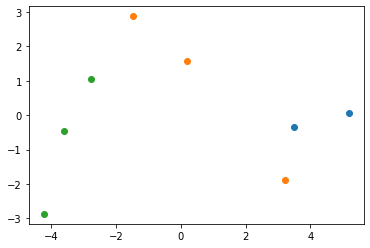

In [31]:
for predict in range(3):
    x_one_pre = x_pca[torch.max(model(x_train), axis=1).indices==predict]
    plt.scatter(x_one_pre[:, 0], x_one_pre[:, 1])

### Accuracy

In [32]:
hypothesis = model(x_train)

prediction = torch.max(model(x_train), axis=1).indices

correct_prediction = prediction.float() == y_train

accuracy = correct_prediction.sum().item() / correct_prediction.shape[0]

accuracy * 100

100.0